
# MTL-Bioinformatics-2016 - Load, Explore, and Save Tag Distribution Plots

This notebook automatically loads all datasets under the `data/` folder in the MTL-Bioinformatics-2016 dataset.

It reads all available datasets, including:
- BC5CDR
- NCBI Disease
- JNLPBA
- CRAFT
- Linnaeus

It also saves the tag distribution plots for each dataset into a dedicated `plots` folder.


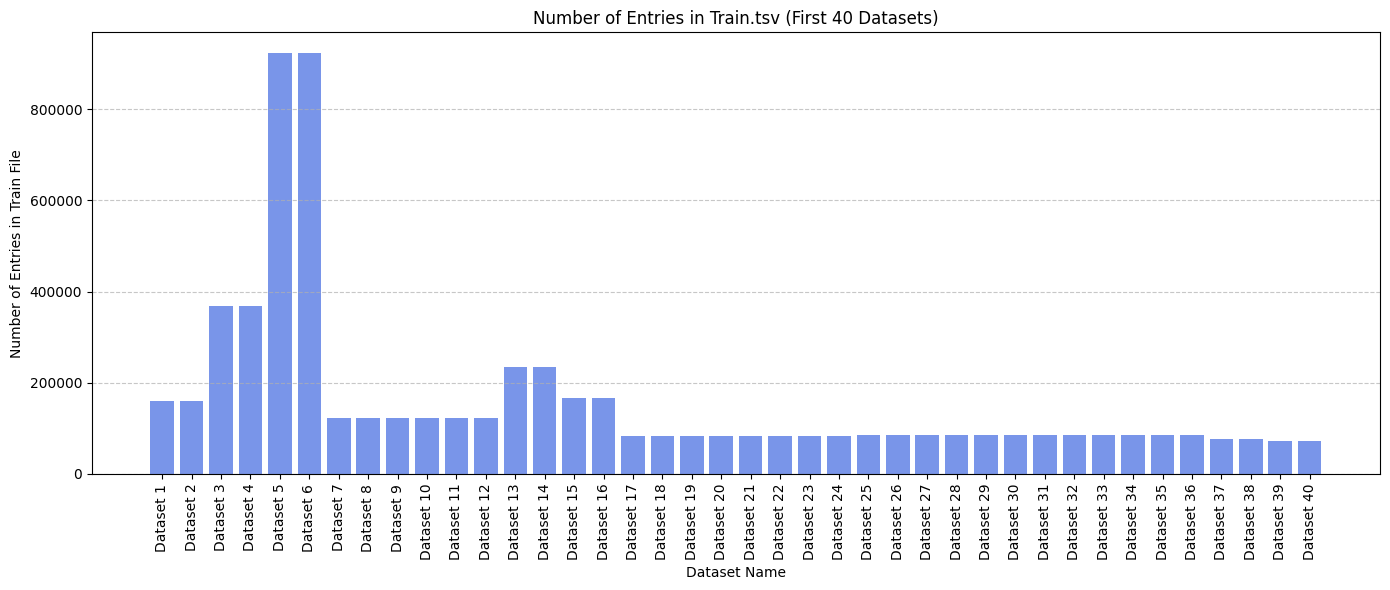

In [9]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the base directory
base_dir = "MTL-Bioinformatics-2016_1/data"

# Dictionary to hold dataset sizes
dataset_counts = defaultdict(lambda: {"train": 0})

# Limit to the first 40 datasets
num_datasets = 40
processed_datasets = 0

# Traverse the dataset directory
for dataset_id in range(1, num_datasets + 1):
    dataset_path = os.path.join(base_dir, str(dataset_id))

    if os.path.exists(dataset_path):
        for subdir in os.listdir(dataset_path):
            train_path = os.path.join(dataset_path, subdir, "train.tsv")
            if os.path.exists(train_path):
                with open(train_path, "r", encoding="utf-8") as file:
                    dataset_counts[f"Dataset {dataset_id}"]["train"] = sum(1 for _ in file)
                processed_datasets += 1
                break  # Stop searching once train.tsv is found

# Prepare data for plotting
datasets = list(dataset_counts.keys())
train_counts = [dataset_counts[d]["train"] for d in datasets]

# Plot dataset distribution
plt.figure(figsize=(14, 6))
plt.bar(datasets, train_counts, color="royalblue", alpha=0.7)

# Formatting
plt.xlabel("Dataset Name")
plt.ylabel("Number of Entries in Train File")
plt.title("Number of Entries in Train.tsv (First 40 Datasets)")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Define the base directory where datasets are stored
base_dir = "MTL-Bioinformatics-2016_1/data"

# Dictionary to store tag counts per dataset
tag_counts = {}

# Iterate over all dataset folders
for dataset_id in sorted(os.listdir(base_dir)):
    dataset_path = os.path.join(base_dir, dataset_id)
    if os.path.isdir(dataset_path):
        train_file_path = os.path.join(dataset_path, os.listdir(dataset_path)[0], "train.tsv")
        
        if os.path.exists(train_file_path):
            # Read the TSV file and extract tags
            with open(train_file_path, "r", encoding="utf-8") as file:
                lines = file.readlines()
                tags = [line.strip().split()[-1] for line in lines if line.strip() and len(line.split()) > 1]
                tag_counts[dataset_id] = dict(Counter(tags))

# Convert to DataFrame for visualization
tag_df = pd.DataFrame(tag_counts).fillna(0).astype(int)

print(tag_df)


                1      10      11      12      13      14      15      16  \
O          141983  111070  103967  103967  206355  206355  148973  148973   
B-Anatomy    6946       0       0       0       0       0       0       0   
I-Anatomy    4894       0       0       0       0       0       0       0   
B-Disease       0    1774    4182    1774       0       0       0       0   
E-Disease       0    1774       0    1774       0       0       0       0   
...           ...     ...     ...     ...     ...     ...     ...     ...   
S-RNA           0       0       0       0       0       0       0       0   
B-Species       0       0       0       0       0       0       0       0   
I-Species       0       0       0       0       0       0       0       0   
S-Species       0       0       0       0       0       0       0       0   
E-Species       0       0       0       0       0       0       0       0   

              17     18  ...  61      62      63      64      65      66  \

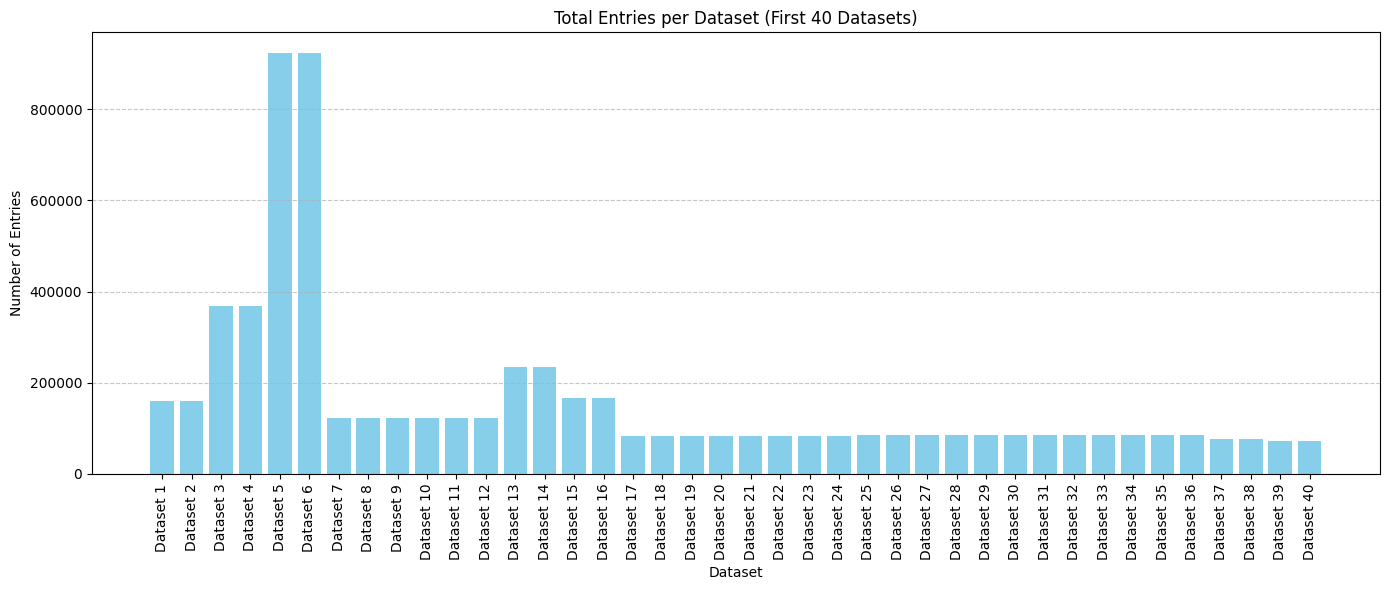

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the base directory where the datasets are stored
base_dir = "MTL-Bioinformatics-2016_1/data"

# Number of datasets to process
num_datasets = 40

# Store dataset names and entry counts
dataset_names = []
entry_counts = []

# Iterate through the first 40 datasets
for i in range(1, num_datasets + 1):
    dataset_path = os.path.join(base_dir, str(i))
    
    # Find the subdirectory containing train.tsv
    for subdir in os.listdir(dataset_path):
        train_path = os.path.join(dataset_path, subdir, "train.tsv")
        if os.path.exists(train_path):
            # Read the TSV file and count the rows
            with open(train_path, "r", encoding="utf-8") as file:
                num_entries = sum(1 for _ in file)
            dataset_names.append(f"Dataset {i}")
            entry_counts.append(num_entries)
            break  # Stop searching once we find train.tsv

# Create a bar plot
plt.figure(figsize=(14, 6))
plt.bar(dataset_names, entry_counts, color="skyblue")
plt.xticks(rotation=90)
plt.xlabel("Dataset")
plt.ylabel("Number of Entries")
plt.title("Total Entries per Dataset (First 40 Datasets)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


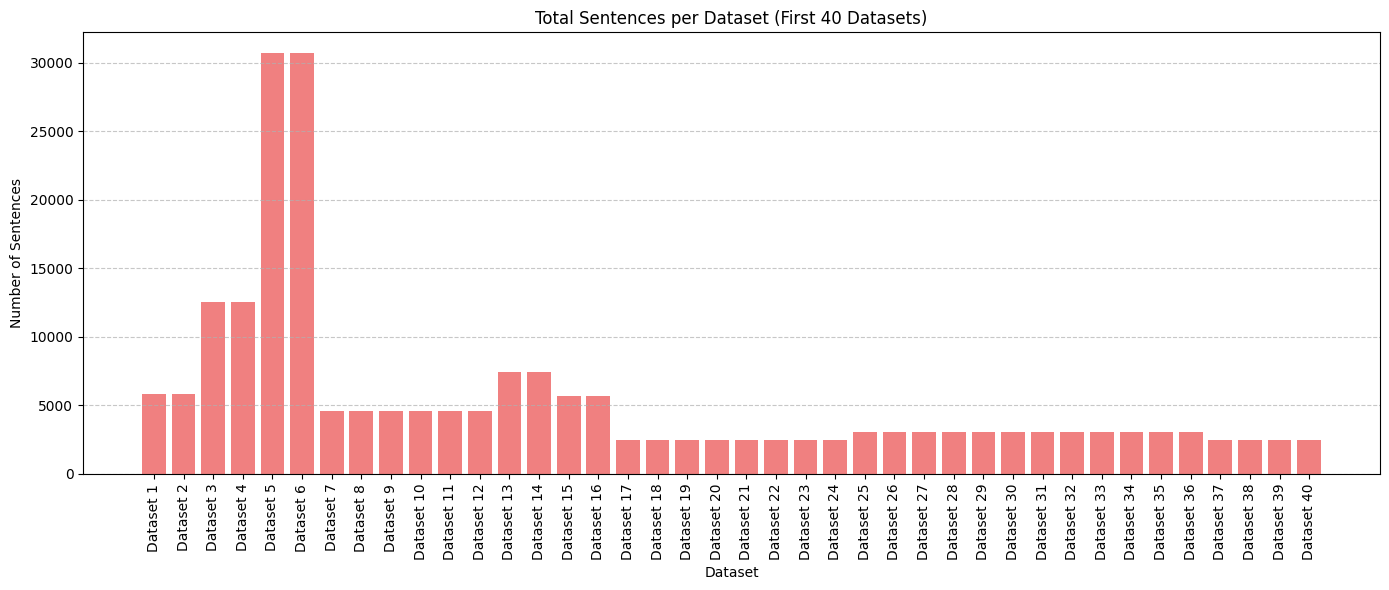

In [6]:
import os
import matplotlib.pyplot as plt

# Define the base directory where the datasets are stored
base_dir = "MTL-Bioinformatics-2016_1/data"

# Number of datasets to process
num_datasets = 40

# Store dataset names and sentence counts
dataset_names = []
sentence_counts = []

# Iterate through the first 40 datasets
for i in range(1, num_datasets + 1):
    dataset_path = os.path.join(base_dir, str(i))
    
    # Find the subdirectory containing train.tsv
    for subdir in os.listdir(dataset_path):
        train_path = os.path.join(dataset_path, subdir, "train.tsv")
        if os.path.exists(train_path):
            num_sentences = 0
            with open(train_path, "r", encoding="utf-8") as file:
                for line in file:
                    if line.strip() == "":  # Blank lines separate sentences
                        num_sentences += 1
            dataset_names.append(f"Dataset {i}")
            sentence_counts.append(num_sentences)
            break  # Stop searching once we find train.tsv

# Create a bar plot
plt.figure(figsize=(14, 6))
plt.bar(dataset_names, sentence_counts, color="lightcoral")
plt.xticks(rotation=90)
plt.xlabel("Dataset")
plt.ylabel("Number of Sentences")
plt.title("Total Sentences per Dataset (First 40 Datasets)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


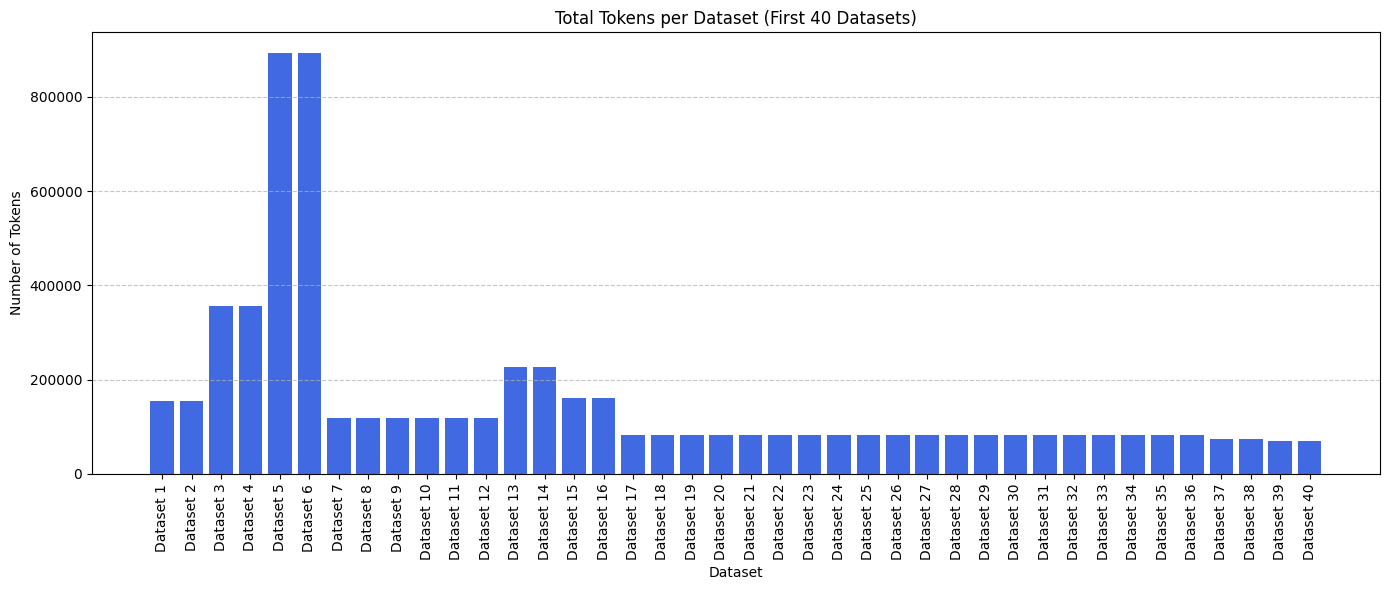

In [7]:
import os
import matplotlib.pyplot as plt

# Define the base directory where the datasets are stored
base_dir = "MTL-Bioinformatics-2016_1/data"

# Number of datasets to process
num_datasets = 40

# Store dataset names and token counts
dataset_names = []
token_counts = []

# Iterate through the first 40 datasets
for i in range(1, num_datasets + 1):
    dataset_path = os.path.join(base_dir, str(i))
    
    # Find the subdirectory containing train.tsv
    for subdir in os.listdir(dataset_path):
        train_path = os.path.join(dataset_path, subdir, "train.tsv")
        if os.path.exists(train_path):
            num_tokens = 0
            with open(train_path, "r", encoding="utf-8") as file:
                for line in file:
                    line = line.strip()
                    if line and not line.startswith("#"):  # Ignore blank lines and comments
                        num_tokens += 1  # Each line typically contains one token
            dataset_names.append(f"Dataset {i}")
            token_counts.append(num_tokens)
            break  # Stop searching once we find train.tsv

# Create a bar plot
plt.figure(figsize=(14, 6))
plt.bar(dataset_names, token_counts, color="royalblue")
plt.xticks(rotation=90)
plt.xlabel("Dataset")
plt.ylabel("Number of Tokens")
plt.title("Total Tokens per Dataset (First 40 Datasets)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [1]:

import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Base path where data is stored (update this if needed)
base_folder = 'MTL-Bioinformatics-2016/MTL-Bioinformatics-2016-master/data'

# Create folder for plots
plots_folder = 'MTL-Bioinformatics-2016/plots'
os.makedirs(plots_folder, exist_ok=True)

# Helper function to read CoNLL format files
def read_conll_file(filepath):
    sentences = []
    sentence = []
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            if line.strip():
                sentence.append(line.strip().split())
            else:
                if sentence:
                    sentences.append(sentence)
                    sentence = []
    if sentence:  # capture the last sentence
        sentences.append(sentence)
    return sentences

# Function to extract tokens and tags from sentences
def extract_tokens_and_tags(sentences):
    tokens, tags = [], []
    for sentence in sentences:
        for token, tag in sentence:
            tokens.append(token)
            tags.append(tag)
    return tokens, tags

# Function to plot and save tag distribution
def plot_tag_distribution(tags, title, filename):
    tag_counts = Counter(tags)
    plt.figure(figsize=(10, 5))
    plt.bar(tag_counts.keys(), tag_counts.values())
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(plots_folder, filename))
    plt.close()
    print(f"Saved plot: {filename}")


In [2]:

# Load all datasets in 'data/' directory
data = {}

for dataset in os.listdir(base_folder):
    dataset_folder = os.path.join(base_folder, dataset)
    if not os.path.isdir(dataset_folder):
        continue  # skip if not a folder

    train_file = os.path.join(dataset_folder, 'train.tsv')
    test_file = os.path.join(dataset_folder, 'test.tsv')
    dev_file = os.path.join(dataset_folder, 'devel.tsv')

    train_data = read_conll_file(train_file) if os.path.exists(train_file) else []
    test_data = read_conll_file(test_file) if os.path.exists(test_file) else []
    dev_data = read_conll_file(dev_file) if os.path.exists(dev_file) else []

    data[dataset] = {
        'train': train_data,
        'test': test_data,
        'dev': dev_data
    }

    print(f"Loaded {dataset}:")
    print(f"  Train sentences: {len(train_data)}")
    print(f"  Test sentences: {len(test_data)}")
    print(f"  Dev sentences: {len(dev_data)}")


Loaded AnatEM-IOB:
  Train sentences: 5861
  Test sentences: 3830
  Dev sentences: 2118
Loaded AnatEM-IOBES:
  Train sentences: 5861
  Test sentences: 3830
  Dev sentences: 2118
Loaded BC2GM-IOB:
  Train sentences: 12574
  Test sentences: 5038
  Dev sentences: 2519
Loaded BC2GM-IOBES:
  Train sentences: 12574
  Test sentences: 5038
  Dev sentences: 2519
Loaded BC4CHEMD-IOBES:
  Train sentences: 30682
  Test sentences: 26364
  Dev sentences: 30639
Loaded BC4CHEMD:
  Train sentences: 30682
  Test sentences: 26364
  Dev sentences: 30639
Loaded BC5CDR-IOB:
  Train sentences: 4560
  Test sentences: 4797
  Dev sentences: 4581
Loaded BC5CDR-IOBES:
  Train sentences: 4560
  Test sentences: 4797
  Dev sentences: 4581
Loaded BC5CDR-chem-IOB:
  Train sentences: 4560
  Test sentences: 4797
  Dev sentences: 4581
Loaded BC5CDR-chem-IOBES:
  Train sentences: 4560
  Test sentences: 4797
  Dev sentences: 4581
Loaded BC5CDR-disease-IOB:
  Train sentences: 4560
  Test sentences: 4797
  Dev sentences: 458

In [3]:

# Display one sample sentence from each dataset (if available)
for dataset, splits in data.items():
    if len(splits['train']) > 0:
        print(f"Sample sentence from {dataset} (Train Set):")
        for token, tag in splits['train'][0]:
            print(f"{token}\t{tag}")
        print("" + "-"*50 + "")


Sample sentence from AnatEM-IOB (Train Set):
Immunostaining	O
and	O
confocal	O
analysis	O
--------------------------------------------------
Sample sentence from AnatEM-IOBES (Train Set):
Immunostaining	O
and	O
confocal	O
analysis	O
--------------------------------------------------
Sample sentence from BC2GM-IOB (Train Set):
Immunohistochemical	O
staining	O
was	O
positive	O
for	O
S	B-GENE
-	I-GENE
100	I-GENE
in	O
all	O
9	O
cases	O
stained	O
,	O
positive	O
for	O
HMB	B-GENE
-	I-GENE
45	I-GENE
in	O
9	O
(	O
90	O
%	O
)	O
of	O
10	O
,	O
and	O
negative	O
for	O
cytokeratin	B-GENE
in	O
all	O
9	O
cases	O
in	O
which	O
myxoid	O
melanoma	O
remained	O
in	O
the	O
block	O
after	O
previous	O
sections	O
.	O
--------------------------------------------------
Sample sentence from BC2GM-IOBES (Train Set):
Immunohistochemical	O
staining	O
was	O
positive	O
for	O
S	B-GENE
-	I-GENE
100	E-GENE
in	O
all	O
9	O
cases	O
stained	O
,	O
positive	O
for	O
HMB	B-GENE
-	I-GENE
45	E-GENE
in	O
9	O
(	O
90	O
%	O
)	O
of	O
10	O

In [4]:

# Plot and save tag distributions for all datasets
for dataset, splits in data.items():
    if len(splits['train']) > 0:
        _, train_tags = extract_tokens_and_tags(splits['train'])
        plot_tag_distribution(train_tags, f"{dataset} - Tag Distribution (Train)", f"{dataset}_tag_distribution.png")


Saved plot: AnatEM-IOB_tag_distribution.png
Saved plot: AnatEM-IOBES_tag_distribution.png
Saved plot: BC2GM-IOB_tag_distribution.png
Saved plot: BC2GM-IOBES_tag_distribution.png
Saved plot: BC4CHEMD-IOBES_tag_distribution.png
Saved plot: BC4CHEMD_tag_distribution.png
Saved plot: BC5CDR-IOB_tag_distribution.png
Saved plot: BC5CDR-IOBES_tag_distribution.png
Saved plot: BC5CDR-chem-IOB_tag_distribution.png
Saved plot: BC5CDR-chem-IOBES_tag_distribution.png
Saved plot: BC5CDR-disease-IOB_tag_distribution.png
Saved plot: BC5CDR-disease-IOBES_tag_distribution.png
Saved plot: BioNLP09-IOB_tag_distribution.png
Saved plot: BioNLP09-IOBES_tag_distribution.png
Saved plot: BioNLP11EPI-IOB_tag_distribution.png
Saved plot: BioNLP11EPI-IOBES_tag_distribution.png
Saved plot: BioNLP11ID-IOB_tag_distribution.png
Saved plot: BioNLP11ID-IOBES_tag_distribution.png
Saved plot: BioNLP11ID-chem-IOB_tag_distribution.png
Saved plot: BioNLP11ID-chem-IOBES_tag_distribution.png
Saved plot: BioNLP11ID-ggp-IOB_tag_d

In [5]:
import json
# Helper function to read CoNLL files (same logic as before)
def read_conll_file(filepath):
    sentences = []
    sentence = []
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            if line.strip():
                sentence.append(line.strip().split())
            else:
                if sentence:
                    sentences.append(sentence)
                    sentence = []
    if sentence:
        sentences.append(sentence)
    return sentences

# Extract tags from sentences
def extract_tags(sentences):
    tags = []
    for sentence in sentences:
        for _, tag in sentence:
            tags.append(tag)
    return tags

# Dictionary to hold statistics for each dataset
dataset_stats = {}

# Loop through each dataset folder in `data/`
if os.path.exists(base_folder):
    for dataset in os.listdir(base_folder):
        dataset_folder = os.path.join(base_folder, dataset)
        if not os.path.isdir(dataset_folder):
            continue

        # Identify train, test, dev files (some datasets might miss some splits)
        train_file = os.path.join(dataset_folder, 'train.tsv')
        test_file = os.path.join(dataset_folder, 'test.tsv')
        dev_file = os.path.join(dataset_folder, 'devel.tsv')

        # Load the datasets (some might be empty if the files are missing)
        train_data = read_conll_file(train_file) if os.path.exists(train_file) else []
        test_data = read_conll_file(test_file) if os.path.exists(test_file) else []
        dev_data = read_conll_file(dev_file) if os.path.exists(dev_file) else []

        # Combine all splits to calculate overall statistics
        all_sentences = train_data + test_data + dev_data
        all_tags = extract_tags(all_sentences)

        tag_counts = Counter(all_tags)

        # Store stats for this dataset
        dataset_stats[dataset] = {
            "num_train_sentences": len(train_data),
            "num_test_sentences": len(test_data),
            "num_dev_sentences": len(dev_data),
            "total_sentences": len(all_sentences),
            "total_tokens": sum(tag_counts.values()),
            "tag_counts": dict(tag_counts)
        }

# Save summary as a JSON file
summary_file_path = "/media/smartdragon/WORK/6th Semester/22AIE315 - Natural Language Processing/Project/MTL_Bioinformatics_2016_Dataset_Summary.json"
with open(summary_file_path, "w", encoding="utf-8") as f:
    json.dump(dataset_stats, f, indent=4)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset summary from the JSON file the user provided
with open("MTL_Bioinformatics_2016_Dataset_Summary.json", "r", encoding="utf-8") as f:
    dataset_summary = json.load(f)

# Prepare summary DataFrame for visualization
summary_data = []

for dataset, stats in dataset_summary.items():
    total_entities = sum(v for k, v in stats['tag_counts'].items() if k != 'O')  # Only count entities, not 'O'
    summary_data.append({
        "Dataset": dataset,
        "Train Sentences": stats["num_train_sentences"],
        "Test Sentences": stats["num_test_sentences"],
        "Dev Sentences": stats["num_dev_sentences"],
        "Total Sentences": stats["total_sentences"],
        "Total Tokens": stats["total_tokens"],
        "Total Entities": total_entities
    })

# Convert to DataFrame for plotting
df_summary = pd.DataFrame(summary_data)

# Plot: Total Sentences per Dataset
plt.figure(figsize=(12, 6))
plt.barh(df_summary["Dataset"], df_summary["Total Sentences"])
plt.xlabel("Number of Sentences")
plt.title("Total Sentences per Dataset")
plt.tight_layout()
plt.savefig("Total_Sentences_per_Dataset.png")
plt.close()

# Plot: Total Entities per Dataset
plt.figure(figsize=(12, 6))
plt.barh(df_summary["Dataset"], df_summary["Total Entities"])
plt.xlabel("Number of Entities")
plt.title("Total Entities per Dataset")
plt.tight_layout()
plt.savefig("Total_Entities_per_Dataset.png")
plt.close()

# Plot: Total Tokens per Dataset
plt.figure(figsize=(12, 6))
plt.barh(df_summary["Dataset"], df_summary["Total Tokens"])
plt.xlabel("Number of Tokens")
plt.title("Total Tokens per Dataset")
plt.tight_layout()
plt.savefig("Total_Tokens_per_Dataset.png")
plt.close()

# Save summary DataFrame to CSV
csv_path = "MTL_Bioinformatics_2016_Dataset_Summary.csv"
df_summary.to_csv(csv_path, index=False)